# Deep Learningによるirisの分類

## irisデータの可視化

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import itertools

In [3]:
iris = load_iris()
features = iris.data
feature_names = iris.feature_names
targets = iris.target
target_names = iris.target_names

In [4]:
iris_data = pd.DataFrame(features, columns=feature_names)
iris_target = pd.DataFrame(targets, columns=["type"])
iris_all = pd.concat([iris_data, iris_target], axis=1)
iris_all.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


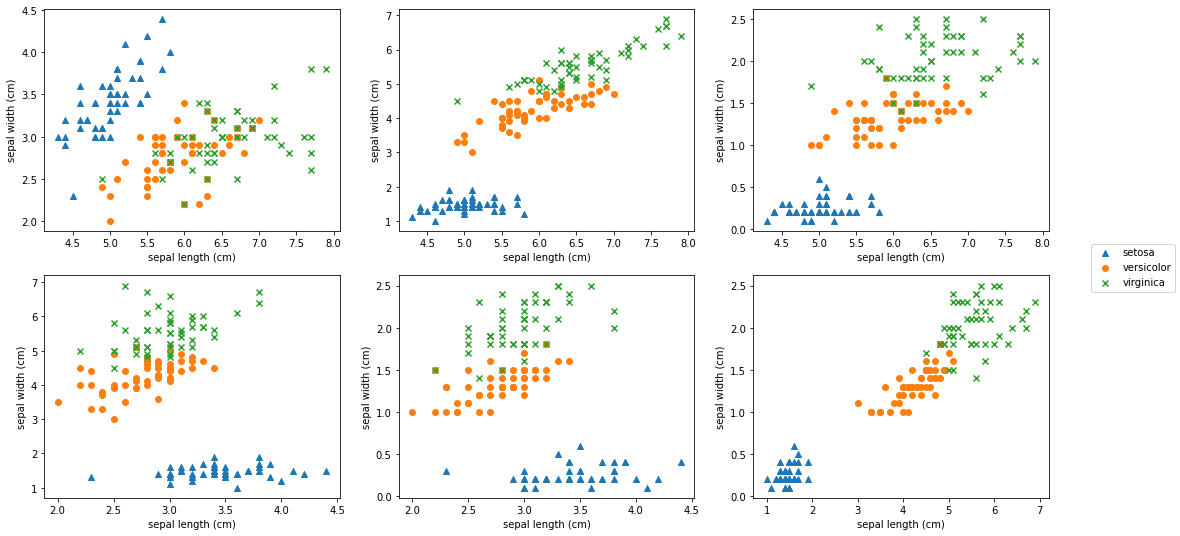

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(18, 9))
one_dim_axes = ax.ravel()

for i, (x, y) in enumerate(itertools.combinations(range(4), 2)):
    for j, marker in zip(range(3), '^ox'):
        one_dim_axes[i].scatter(features[targets == j, x], features[targets == j, y], label=target_names[j], marker=marker)
        one_dim_axes[i].set_xlabel(feature_names[0])
        one_dim_axes[i].set_ylabel(feature_names[1])

lines, labels = one_dim_axes[0].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'right')
plt.show()